In [34]:
import pandas as pd
from nsepy import get_history
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

#!pip install yfinance
from nsepy import get_history
import datetime as dt
import yfinance as yf
    
# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol='AXISBANK.NS'
    
stk_data=yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.917419,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.802673,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.393616,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.830872,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,747.841553,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,667.591309,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,665.948425,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,675.606262,5586980


In [2]:
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [7]:
stk_data.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [3]:
column='Close'

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data1=ms.fit_transform(stk_data[[column]])
print('len:',data1.shape)

len(data1)

training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size: ]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size: ]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

len: (150, 1)
120
X_train length: (120, 1)
X_test length: (30, 1)
y_train length: (120, 1)
y_test length: (30, 1)


In [9]:
y_train

array([[0.48479407],
       [0.44278363],
       [0.51314458],
       [0.4688145 ],
       [0.51546392],
       [0.49097938],
       [0.44149497],
       [0.48015477],
       [0.45025792],
       [0.43891765],
       [0.51443324],
       [0.50876295],
       [0.45103093],
       [0.43917532],
       [0.4559279 ],
       [0.45489691],
       [0.41881443],
       [0.45386623],
       [0.56829897],
       [0.57371159],
       [0.51984555],
       [0.50103099],
       [0.49149503],
       [0.51314458],
       [0.56314433],
       [0.55283505],
       [0.57628891],
       [0.53247448],
       [0.49613402],
       [0.52835052],
       [0.6167527 ],
       [0.61314439],
       [0.6342786 ],
       [0.61881468],
       [0.53659813],
       [0.48788672],
       [0.49304136],
       [0.53762912],
       [0.5422681 ],
       [0.41546411],
       [0.37010334],
       [0.34097951],
       [0.2979384 ],
       [0.36108273],
       [0.45103093],
       [0.52938151],
       [0.50618563],
       [0.462

In [15]:
range(len(y_train))

range(0, 120)

In [13]:
Actual_y_train

,Open,High,Low,Close
0,0.484794,0.484794,0.484794,0.484794
1,0.442784,0.442784,0.442784,0.442784
2,0.513145,0.513145,0.513145,0.513145
3,0.468814,0.468814,0.468814,0.468814
4,0.515464,0.515464,0.515464,0.515464
...,...,...,...,...
115,0.386856,0.386856,0.386856,0.386856
116,0.315722,0.315722,0.315722,0.315722
117,0.284794,0.284794,0.284794,0.284794
118,0.181959,0.181959,0.181959,0.181959


In [36]:
lags = [1, 2, 3, 4]
trends = ['n', 't', 'c', 'ct']

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(X_train), len(data1) - 1)

        # Calculate RMSE and MAPE
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        print('Lag={}, Trend={}'.format(i, td))
        print("RMSE-Testset:", rmse)
        print("maPe-Testset:", mape)
        print('*********')

Lag=1, Trend=n
RMSE-Testset: 0.08745948767721823
maPe-Testset: 25989777444545.574
*********
Lag=1, Trend=t
RMSE-Testset: 0.3141377508980852
maPe-Testset: 17589164887583.164
*********
Lag=1, Trend=c
RMSE-Testset: 0.2129949844829164
maPe-Testset: 35886407714783.43
*********
Lag=1, Trend=ct
RMSE-Testset: 0.08872506510128948
maPe-Testset: 27757453315533.465
*********
Lag=2, Trend=n
RMSE-Testset: 0.0881003784786237
maPe-Testset: 25720868639164.863
*********
Lag=2, Trend=t
RMSE-Testset: 0.19126124031819475
maPe-Testset: 21183379633872.67
*********
Lag=2, Trend=c
RMSE-Testset: 0.31059203605217545
maPe-Testset: 45236919809470.234
*********
Lag=2, Trend=ct
RMSE-Testset: 0.23697921146918882
maPe-Testset: 40016013136375.74
*********
Lag=3, Trend=n
RMSE-Testset: 0.08885048244963126
maPe-Testset: 27532077278316.504
*********
Lag=3, Trend=t
RMSE-Testset: 0.18758635370550214
maPe-Testset: 22735029957349.992
*********
Lag=3, Trend=c
RMSE-Testset: 0.2824395970186907
maPe-Testset: 43014730017664.32
****

C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be remove

In [37]:
i = 1
td = "ct"
model = AutoReg(X_train, lags=i, trend=td)
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

# Calculate RMSE, MAPE and R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lag={}, Trend={}".format(i, td))
print("RMSE-Testset:", rmse)
print("maPe-Testset:", mape)
print("R^2-Testset:", r2)
print('*************')

Lag=1, Trend=ct
RMSE-Testset: 0.08872506510128948
maPe-Testset: 27757453315533.465
R^2-Testset: -0.0921997295483199
*************


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


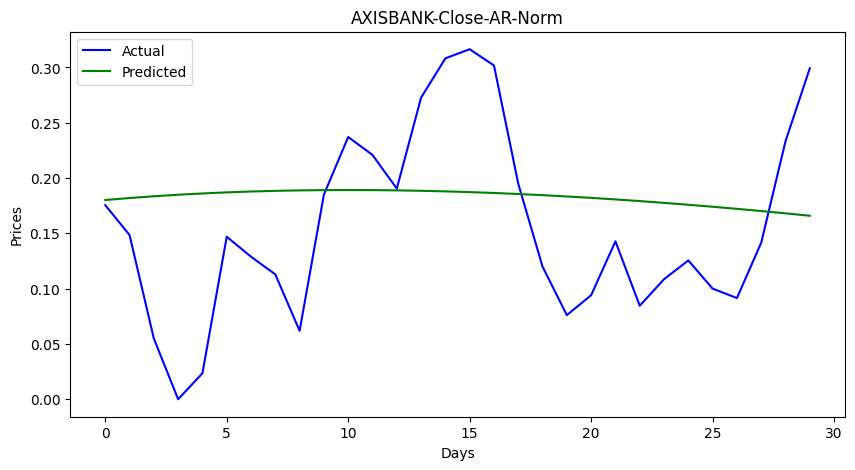

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, color='blue', label="Actual")
plt.plot(y_pred, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Norm")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [25]:
y_test

array([[0.17551572],
       [0.14845386],
       [0.05489703],
       [0.        ],
       [0.02345386],
       [0.14690722],
       [0.12886598],
       [0.11288672],
       [0.06185567],
       [0.18505167],
       [0.2371134 ],
       [0.22087648],
       [0.19046398],
       [0.27268054],
       [0.30824767],
       [0.31649497],
       [0.30180438],
       [0.19484561],
       [0.11984536],
       [0.07603093],
       [0.09407216],
       [0.14278357],
       [0.08453621],
       [0.10850541],
       [0.12551565],
       [0.10000013],
       [0.09149485],
       [0.14149491],
       [0.23324742],
       [0.29922706]])

In [40]:
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_stock_price_test_ori = ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

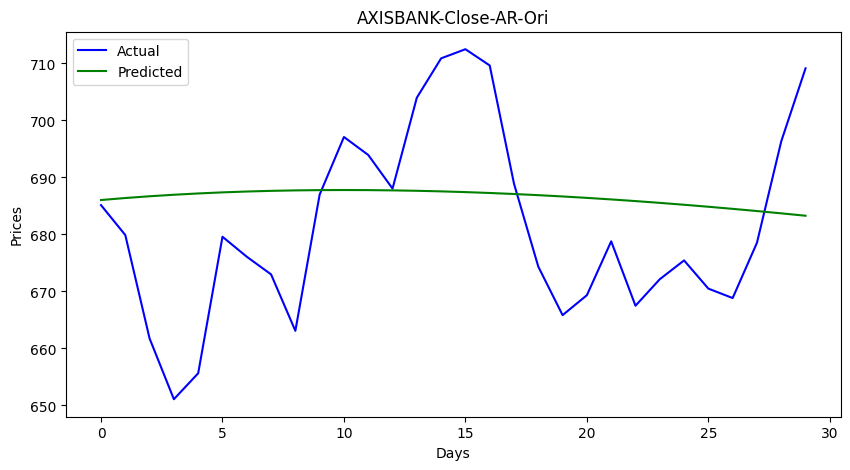

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP, color='green', label="Predicted")
plt.title("AXISBANK-Close-AR-Ori")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [44]:
rmse_ori = mean_squared_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriP, squared=False)
mape_ori = mean_absolute_percentage_error(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)
print("RMSE-Testset (Original):", rmse_ori)
print("maPe-Testset (Original):", mape_ori)

RMSE-Testset (Original): 17.212662629650136
maPe-Testset (Original): 0.02146590863572901


C:\Users\saran\anaconda3\envs\aimachine\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [47]:
forecast

array([0.16368671, 0.1613693 , 0.15897667, 0.15651145])

In [48]:
forecast_stock_price_test_oriF

,Closefore
0,682.855198
1,682.405620
2,681.941449
3,681.463197


In [46]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv", index=False)

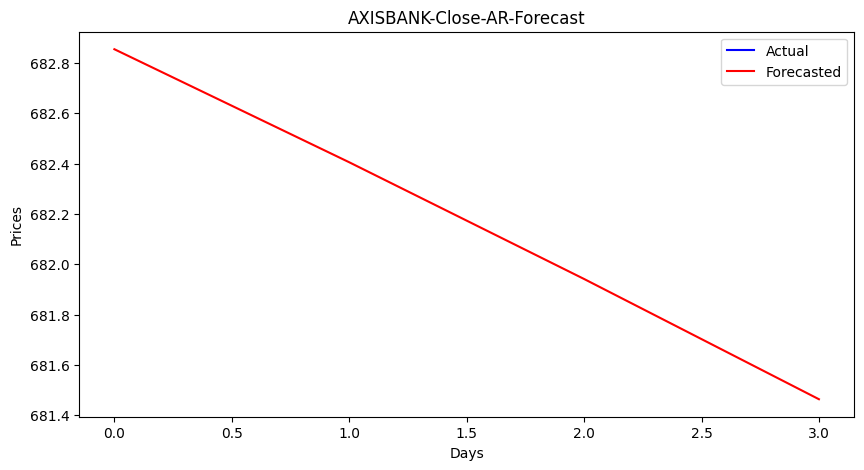

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA[116:145], color='blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color='red', label="Forecasted")
plt.title("AXISBANK-Close-AR-Forecast")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.legend()
plt.show()